## **Universidad Galileo**
## **Maestría en Data Science**
## **Text Mining & Image Recognition**
## **Antonio Everardo Navas Contreras, 14003163**
## **Daniel Josué Rodríguez Paiz, 09001437**
## **Luis Miguel Florian López, 0710082**
## **30/09/2021**

---

## **PROYECTO FINAL**

---

# Análisis de Sentimientos - Trilogía de El Señor de los Anillos 

El objetivo de este proyecto es realizar un análisis de sentimientos por medio de técnicas de Text Mining 

El dataset es un un archivo en formato CSV que cuenta con una entrada por cada línea de dialogo de los personajes de la trilogía. Este se ha obtenido de el siguiente enlace de Kaggle:

https://www.kaggle.com/paultimothymooney/lord-of-the-rings-data?select=lotr_scripts.csv

### **Importing Libraries**

In [ ]:
!pip install NRCLex

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nrclex import NRCLex
from collections import Counter
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import Markdown, display
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### **Cargar, preparar y explorar el dataset**

TODO
- tokenizar
- Cantidad de palabras totales por pelicula, grafiquita de frecuencia
- Top 10 (15?) de personajes con más participación en la trilogía, grafiquita de frecuencia
- top 10 de participación por pelicula, grafiquita de frecuencia
- Eliminación de stop words
- lemantización
- tf-idf
- palabras con más frecuencia en la trilogía BACKLOG
- palabras con más frecuencia por pelicula BACKLOG
- Análisis de Sentimientos (método a definir vader o naive bayes) 
- Sentimientos Negativos
- Sentimientos Positivos
- Análisis de sentimientos de personajes más participativos


#### **Exploración de Datos**

In [ ]:
lotr_df = pd.read_csv("lotr_scripts.csv")
lotr_df.head(10)

,Unnamed: 0,char,dialog,movie
0,0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King
2,2,DEAGOL,Arrghh!,The Return of the King
3,3,SMEAGOL,Deagol!,The Return of the King
4,4,SMEAGOL,Deagol!,The Return of the King
5,5,SMEAGOL,Deagol!,The Return of the King
6,6,SMEAGOL,Give us that! Deagol my love,The Return of the King
7,7,DEAGOL,Why?,The Return of the King
8,8,SMEAGOL,"Because' , it's my birthday and I wants it.",The Return of the King
9,9,SMEAGOL,My precious.,The Return of the King


In [ ]:
print("Shape dataset original:", lotr_df.shape)

Shape dataset original: (2388, 4)


In [ ]:
lotr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2388 non-null   int64 
 1   char        2388 non-null   object
 2   dialog      2388 non-null   object
 3   movie       2388 non-null   object
dtypes: int64(1), object(3)
memory usage: 74.8+ KB


In [ ]:
# Revisar valores unicos en cada variable

for i in lotr_df.columns:
  #print(i, ':\n', np.unique(str(lotr_df[i])), '\n')
  print(i, ':\n', np.unique(list(lotr_df[i])), '\n')

Unnamed: 0 :
 [   0    1    2 ... 2385 2386 2387] 

char :
 ['(GOLLUM' 'ARAGORN' 'ARAGORN ' 'ARGORN' 'ARMY' 'ARWEN' 'ARWEN VOICEOVER'
 'BARLIMAN' 'BILBO' 'BILBO VOICEOVER' 'BOROMIR' 'BOROMIR ' 'BOSON'
 'CAPTAIN' 'CHILDREN HOBBITS' 'CROWD' 'DAMROD' 'DEAGOL' 'DENETHOR'
 'ELROND' 'ELROND VOICEOVER' 'EOMER' 'EOTHAIN' 'EOWYN' 'EOWYN/MERRY'
 'EYE OF SAURON' 'FARAMIR' 'FARMER MAGGOT' 'FIGWIT' 'FREDA' 'FRODO'
 'FRODO ' 'FRODO VOICE' 'FRODO VOICE OVER' 'GAFFER' 'GALADRIEL'
 'GALADRIEL VOICE OVER' 'GALADRIEL VOICE-OVER' 'GALADRIEL VOICEOVER'
 'GALADRIL' 'GAMLING' 'GAN DALF' 'GANDALF' 'GANDALF VOICE OVER'
 'GANDALF VOICEOVER' 'GATEKEEPER' 'GATEKEEPR' 'GENERAL' 'GENERAL SHOUT'
 'GIMLI' 'GOLLUM' 'GORBAG' 'GOTHMOG' 'GRIMA' 'GRIMBOLD' 'GRISHNAK'
 'GRISHNAKH' 'HALDIR' 'HAMA' 'HOBBIT' 'IROLAS' 'KING OF THE DEAD' 'LADY'
 'LEGOLAS' 'MADRIL' 'MAN' 'MEN' 'MERCENARY' 'MERRY' 'MERRY AND PIPPIN'
 'MERRY and PIPPIN' 'MORWEN' 'MOUTH OF SAURON' 'MRS BRACEGIRDLE' 'NOAKES'
 'OLD MAN' 'ORC' 'ORCS' 'PEOPLE' 'PIPPIN'

In [ ]:
# Nombres de las películas

movies_name = np.unique(lotr_df['movie'])
movies_name

array(['The Fellowship of the Ring ', 'The Return of the King ',
       'The Two Towers '], dtype=object)

In [ ]:
characters_name = np.unique(lotr_df['char'])
characters_name

array(['(GOLLUM', 'ARAGORN', 'ARAGORN ', 'ARGORN', 'ARMY', 'ARWEN',
       'ARWEN VOICEOVER', 'BARLIMAN', 'BILBO', 'BILBO VOICEOVER',
       'BOROMIR', 'BOROMIR ', 'BOSON', 'CAPTAIN', 'CHILDREN HOBBITS',
       'CROWD', 'DAMROD', 'DEAGOL', 'DENETHOR', 'ELROND',
       'ELROND VOICEOVER', 'EOMER', 'EOTHAIN', 'EOWYN', 'EOWYN/MERRY',
       'EYE OF SAURON', 'FARAMIR', 'FARMER MAGGOT', 'FIGWIT', 'FREDA',
       'FRODO', 'FRODO ', 'FRODO VOICE', 'FRODO VOICE OVER', 'GAFFER',
       'GALADRIEL', 'GALADRIEL VOICE OVER', 'GALADRIEL VOICE-OVER',
       'GALADRIEL VOICEOVER', 'GALADRIL', 'GAMLING', 'GAN DALF',
       'GANDALF', 'GANDALF VOICE OVER', 'GANDALF VOICEOVER', 'GATEKEEPER',
       'GATEKEEPR', 'GENERAL', 'GENERAL SHOUT', 'GIMLI', 'GOLLUM',
       'GORBAG', 'GOTHMOG', 'GRIMA', 'GRIMBOLD', 'GRISHNAK', 'GRISHNAKH',
       'HALDIR', 'HAMA', 'HOBBIT', 'IROLAS', 'KING OF THE DEAD', 'LADY',
       'LEGOLAS', 'MADRIL', 'MAN', 'MEN', 'MERCENARY', 'MERRY',
       'MERRY AND PIPPIN', 'MERRY and P

In [ ]:
# Separar los datasets por película

TFOTR = lotr_df.iloc[np.where(lotr_df['movie'] == movies_name[0])]
TROTHK  = lotr_df.iloc[np.where(lotr_df['movie'] == movies_name[1])]
TTT  = lotr_df.iloc[np.where(lotr_df['movie'] == movies_name[2])]

print('Total de diálogos en "The Fellowship of the Ring": ', TFOTR.shape[0])
print('Total de diálogos en "The Two Towers":             ', TTT.shape[0])
print('Total de diálogos en "The Return of the King":     ', TROTHK.shape[0])

Total de diálogos en "The Fellowship of the Ring":  505
Total de diálogos en "The Two Towers":              1010
Total de diálogos en "The Return of the King":      873


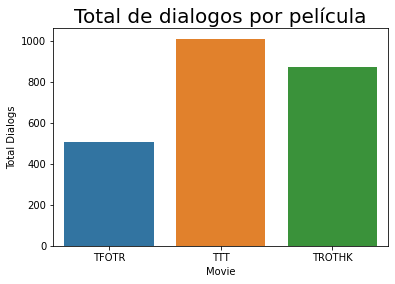

In [ ]:
# Histograma de Total de Dialogos de cada película

total_dialogs = pd.DataFrame({'Movie' : ['TFOTR', 'TTT','TROTHK'],
                              'Total Dialogs' : [TFOTR.shape[0], TTT.shape[0], TROTHK.shape[0]]})
sns.barplot(data=total_dialogs, x='Movie', y='Total Dialogs')
plt.title("Total de dialogos por película", fontdict={"fontsize":20, "color":"black"})
plt.show()

In [ ]:
def get_words_from_df(df,column):
  words = ""
  for index, row in df.iterrows():
    words += str(row[column])+" "
  return words

In [ ]:

words_TFOTR = text_to_word_sequence(get_words_from_df(TFOTR,"dialog"))
words_TROTHK = text_to_word_sequence(get_words_from_df(TROTHK,"dialog"))
words_TTT = text_to_word_sequence(get_words_from_df(TTT,"dialog"))


total_words = pd.DataFrame({'Movie' : ['TFOTR', 'TTT', 'TROTHK'],
                            'Total Words' : [len(words_TFOTR), len(words_TTT),  len(words_TROTHK)]})

print('Total de palabras en "The Fellowship of the Ring": ', len(words_TFOTR))
print('Total de palabras en "The Two Towers":             ', len(words_TTT))
print('Total de palabras en "The Return of the King":     ', len(words_TROTHK))

Total de palabras en "The Fellowship of the Ring":  5470
Total de palabras en "The Two Towers":              10230
Total de palabras en "The Return of the King":      9542


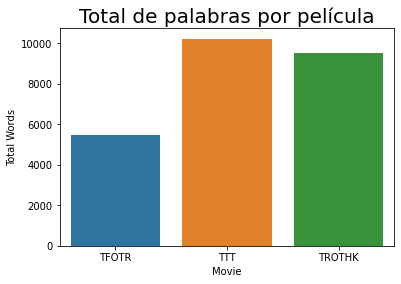

In [ ]:
# Histograma de palabras de cada película

sns.barplot(data=total_words, x='Movie', y='Total Words')
plt.title("Total de palabras por película", fontdict={"fontsize":20, "color":"black"})
plt.show()

In [ ]:
# Histograma de diálogos por personaje en la trilogía
chars_trilogy_dialogs = lotr_df['char'].value_counts().head(10).reset_index()
chars_trilogy_dialogs.columns=['Character', 'Dialogs']
chars_trilogy_dialogs

,Character,Dialogs
0,FRODO,225
1,SAM,216
2,GANDALF,205
3,ARAGORN,185
4,PIPPIN,163
5,MERRY,137
6,GOLLUM,133
7,GIMLI,115
8,THEODEN,110
9,FARAMIR,65


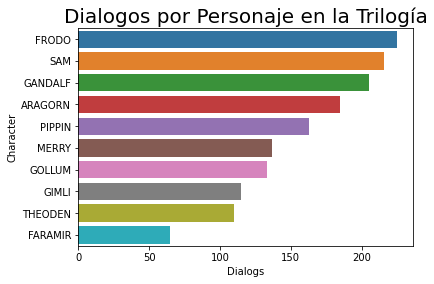

In [ ]:
sns.barplot(data=chars_trilogy_dialogs, x='Dialogs', y='Character', orient="h")
plt.title("Dialogos por Personaje en la Trilogía", fontdict={"fontsize":20, "color":"black"})
plt.show()

### 10 personajes con más dálogos en The Fellowship of the Ring

In [ ]:
# Histograma de diálogos por personaje en la trilogía
tfotr_dialogs = TFOTR['char'].value_counts().head(10).reset_index()
tfotr_dialogs.columns=['Character', 'Dialogs']
tfotr_dialogs

,Character,Dialogs
0,GANDALF,72
1,FRODO,70
2,MERRY,41
3,BILBO,41
4,PIPPIN,38
5,SAM,38
6,ARAGORN,27
7,BOROMIR,25
8,STRIDER,25
9,GIMLI,23


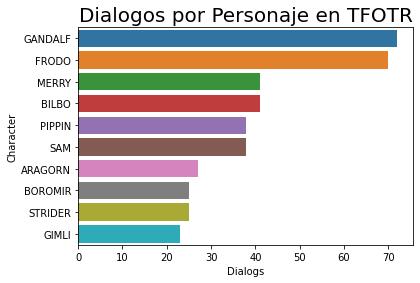

In [ ]:
sns.barplot(data=tfotr_dialogs, x='Dialogs', y='Character', orient="h")
plt.title("Dialogos por Personaje en TFOTR", fontdict={"fontsize":20, "color":"black"})
plt.show()

### 10 personajes con más dálogos en The Two Towers






In [ ]:
# Histograma de diálogos por personaje en la trilogía
ttt_dialogs = TTT['char'].value_counts().head(10).reset_index()
ttt_dialogs.columns=['Character', 'Dialogs']
ttt_dialogs

,Character,Dialogs
0,ARAGORN,97
1,SAM,87
2,FRODO,82
3,GOLLUM,78
4,THEODEN,64
5,GIMLI,58
6,PIPPIN,56
7,MERRY,55
8,TREEBEARD,43
9,FARAMIR,41


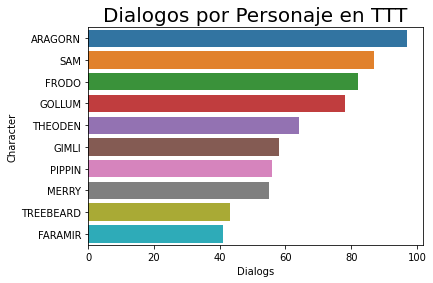

In [ ]:
sns.barplot(data=ttt_dialogs, x='Dialogs', y='Character', orient="h")
plt.title("Dialogos por Personaje en TTT", fontdict={"fontsize":20, "color":"black"})
plt.show()

### 10 personajes con más dálogos en The Return of The King

In [ ]:
# Histograma de diálogos por personaje en la trilogía
trotk_dialogs = TROTHK['char'].value_counts().head(10).reset_index()
trotk_dialogs.columns=['Character', 'Dialogs']
trotk_dialogs

,Character,Dialogs
0,GANDALF,94
1,SAM,91
2,FRODO,73
3,PIPPIN,69
4,ARAGORN,61
5,GOLLUM,52
6,THEODEN,46
7,MERRY,41
8,DENETHOR,35
9,GIMLI,34


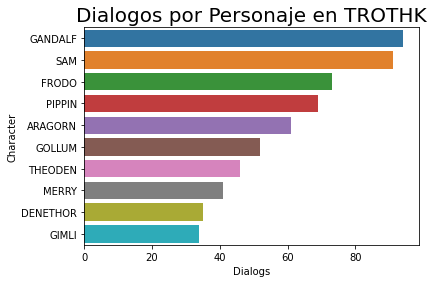

In [ ]:
sns.barplot(data=trotk_dialogs, x='Dialogs', y='Character', orient="h")
plt.title("Dialogos por Personaje en TROTHK", fontdict={"fontsize":20, "color":"black"})
plt.show()

### Normalización de Información

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
dialogs =  lotr_df['dialog'].tolist()
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.add('ive')
cleaned_dialogs = []
stemming = PorterStemmer()
lemmatizer = WordNetLemmatizer()
bag_of_words = []

for dialog in dialogs:
  dialog = re.sub(r'[!?.,()-]', ' ', str(dialog))
  dialog = re.sub(r'\'', '', dialog)
  words = word_tokenize(dialog) #tokenization
  words = [str.lower(word) for word in words]
  words = [word for word in words if word not in (stop_words)]
  words = [stemming.stem(word) for word in words ]
  words = [lemmatizer.lemmatize(word) for word in words]
  bag_of_words.extend(words)
  cleaned_dialogs.append(" ".join(words))

cleaned_dialogs_df = pd.DataFrame( { 'char': lotr_df['char'].tolist(), 'clean_dialogs' : cleaned_dialogs })

cleaned_dialogs_df.to_csv("lotr_cleaned_dialogs.csv")
cleaned_dialogs_df.head(10)
#diag_without_stop_words = lotr_df['dialog'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))

,char,clean_dialogs
0,DEAGOL,oh smeagol got one got fish smeagol smeagol
1,SMEAGOL,pull go go go pull
2,DEAGOL,arrghh
3,SMEAGOL,deagol
4,SMEAGOL,deagol
5,SMEAGOL,deagol
6,SMEAGOL,give u deagol love
7,DEAGOL,
8,SMEAGOL,birthday want
9,SMEAGOL,preciou


### TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(smooth_idf=False)
tfidf = vectorizer.fit_transform(cleaned_dialogs)
#print(tfidf)

In [ ]:
vocabulary = list(vectorizer.vocabulary_.keys())
vocabulary.sort()
tfidf_table = pd.DataFrame(tfidf.todense(), columns=vocabulary)
tfidf_table.head()

,000,10,1296,1400,17,2000,22nd,300,37,38,42,43,500,60,80,aaa,aaaaaaaaa,aaaaaaaaahhhhhhhhhh,aaaaaaaagh,aaaaaahhhh,aaaaagh,aaaaah,aaaaahh,aaaagh,aaaahh,aaaahhh,aaagh,aaahhh,aagh,aah,ab,abandon,abdollen,abl,abroad,abyss,accept,accomod,accord,account,...,wood,woodland,woodsi,word,work,world,worm,wormtongu,worri,wors,worst,worth,worthi,would,wouldnt,wouldv,wound,wraith,wrath,wriggl,wring,wrong,yarvaxea,ye,yeah,year,yeee,yes,yet,yetthat,yield,youd,youll,young,youon,your,youshouldnt,youto,youv,youwhen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_table.shape

(2388, 2644)

In [ ]:
# Palabras mas raras en cada documento. TF-IDF maximo por documento

pd.DataFrame(tfidf_table.idxmax(axis=1), columns=['TF-IDF max per document'])

,TF-IDF max per document
0,smeagol
1,pull
2,arrghh
3,deagol
4,deagol
...,...
2383,merri
2384,merri
2385,alway
2386,hardi


In [ ]:
# Palabras mas raras en cada documento. TF-IDF = 1 en todo el corpus

pd.DataFrame(tfidf_table[tfidf_table.max(axis=1) == 1].idxmax(axis=1), columns=['TF-IDF = 1'])

,TF-IDF = 1
2,arrghh
3,deagol
4,deagol
5,deagol
9,preciou
...,...
2372,come
2379,wont
2381,merri
2383,merri


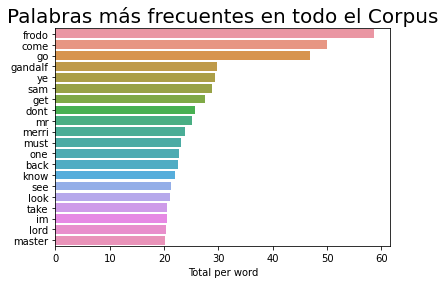

In [ ]:
all_words = pd.DataFrame(tfidf_table.sum(axis=0), columns=['Total per word'])
all_words['BoolResp'] = tfidf_table.sum(axis=0) > 20
most_rare_words = all_words[all_words['BoolResp'] == True].sort_values('Total per word',ascending=False)

sns.barplot(data=most_rare_words, x=most_rare_words['Total per word'], y=most_rare_words.index, orient="h")
plt.title("Palabras más frecuentes en todo el Corpus", fontdict={"fontsize":20, "color":"black"})
plt.show()

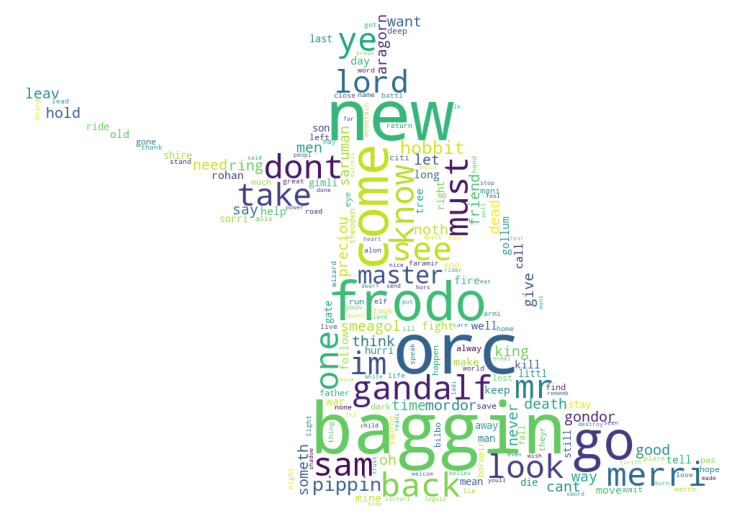

In [ ]:
def word_cloud(strCorpus, k):
  stopwords = set(STOPWORDS)
  mask = np.array(Image.open('gandalf.png'))
  wordcloud = WordCloud(mask=mask,
                        background_color ='white',
                        stopwords = stopwords,
                        max_words = k,
                        min_font_size = 4,
                        width=mask.shape[1],
                        height=mask.shape[0]).generate(strCorpus)

  # Plot WordCloud image					
  #plt.figure(figsize = (8, 8), facecolor = None)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  #plt.title('PALABRAS MAS FRECUENTES\n', fontdict={"fontsize":20, "color":"red", "fontweight":"bold"}) 
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

all_words = pd.DataFrame(tfidf_table.sum(axis=0), columns=['Total per word'])
all_words['BoolResp'] = tfidf_table.sum(axis=0) > 1
most_rare_words = all_words[all_words['BoolResp'] == True].sort_values('Total per word',ascending=False)

words = " ".join(most_rare_words.index.to_list())
word_cloud(words, 200)

## Análisis de Emociones en Palabras y Diálogos

In [ ]:
emotions_lex = NRCLex(" ".join(bag_of_words))

In [ ]:
emotions_df = pd.DataFrame.from_dict(emotions_lex.affect_frequencies,  orient='index', columns=["frequency"])
emotions_df = emotions_df[emotions_df.frequency != 0]
top_emotions_df = emotions_df.sort_values('frequency', ascending=False)

display(Markdown("### **Frecuencia de Emociones**"))
display(top_emotions_df)

### **Frecuencia de Emociones**

,frequency
positive,0.167925
negative,0.166538
fear,0.112926
trust,0.107071
anticipation,0.098752
sadness,0.083808
anger,0.076105
disgust,0.069327
joy,0.068556
surprise,0.048991


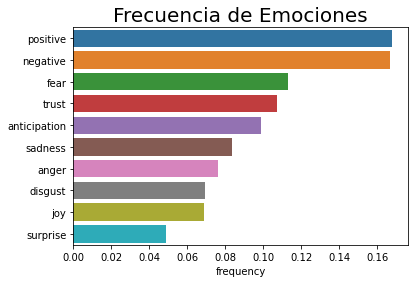

In [ ]:
sns.barplot(data=top_emotions_df, x=top_emotions_df['frequency'], y=top_emotions_df.index, orient="h")
plt.title("Frecuencia de Emociones", fontdict={"fontsize":20, "color":"black"})
plt.show()

In [ ]:
emotions_dict = {
    "positive" : [],
    "negative" : [],
    "fear" : [],
    "trust" : []
}

for word in emotions_lex.words:
  if word in emotions_lex.affect_dict:
    for emotion in emotions_lex.affect_dict[word]:
      if emotion in emotions_dict:
        emotions_dict[emotion].append(word)

In [ ]:
positive_df =  pd.DataFrame.from_dict(Counter(emotions_dict['positive']),
                                      orient='index', 
                                      columns=["count"]).sort_values('count', ascending=False).head(10)
display(Markdown("### **Top 10 de Palabras Positivas**"))
display(positive_df)

### **Top 10 de Palabras Positivas**

,count
master,61
king,61
lord,54
good,47
friend,40
tree,35
love,25
hope,22
save,20
land,20


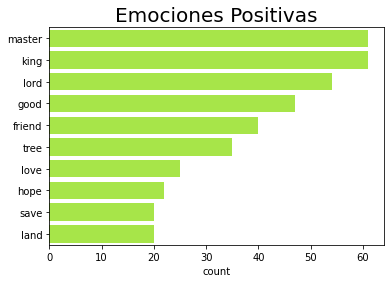

In [ ]:
sns.barplot(data=positive_df, x=positive_df['count'], y=positive_df.index, orient="h",color='greenyellow')
plt.title("Emociones Positivas", fontdict={"fontsize":20, "color":"black"})
plt.show()

In [ ]:
negative_df =  pd.DataFrame.from_dict(Counter(emotions_dict['negative']),
                                      orient='index', 
                                      columns=["count"]).sort_values('count', ascending=False).head(10)

display(Markdown("### **Top 10 Palabras Negativas**"))
display(negative_df)

### **Top 10 Palabras Negativas**

,count
lord,54
death,37
war,37
orc,34
fight,31
die,29
fall,27
kill,26
lie,23
fear,23


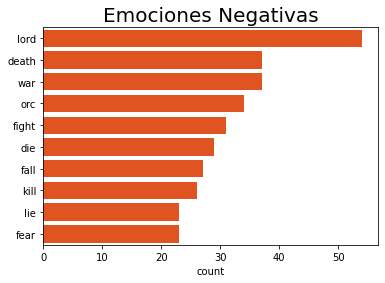

In [ ]:
sns.barplot(data=negative_df, x=negative_df['count'], y=negative_df.index, orient="h",color='orangered')
plt.title("Emociones Negativas", fontdict={"fontsize":20, "color":"black"})
plt.show()

In [ ]:
fear_df =  pd.DataFrame.from_dict(Counter(emotions_dict['fear']),
                                      orient='index', 
                                      columns=["count"]).sort_values('count', ascending=False).head(10)

display(Markdown("### **Top 10 de palabras de emocion de miedo**"))
display(fear_df)

### **Top 10 de palabras de emocion de miedo**

,count
death,37
war,37
orc,34
fight,31
die,29
kill,26
fire,26
fear,23
ill,19
watch,18


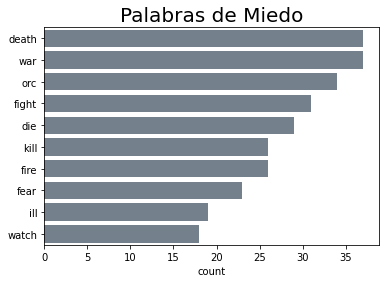

In [ ]:
sns.barplot(data=fear_df, x=fear_df['count'], y=fear_df.index, orient="h",color='slategrey')
plt.title("Palabras de Miedo", fontdict={"fontsize":20, "color":"black"})
plt.show()

In [ ]:
trust_df =  pd.DataFrame.from_dict(Counter(emotions_dict['trust']),orient='index', 
                                      columns=["count"]).sort_values('count', ascending=False).head(10)
display(Markdown("### **Top 10 Palabras de Confianza**"))
display(trust_df)

### **Top 10 Palabras de Confianza**

,count
lord,54
good,47
friend,40
tree,35
father,24
gate,24
hope,22
save,20
word,16
white,16


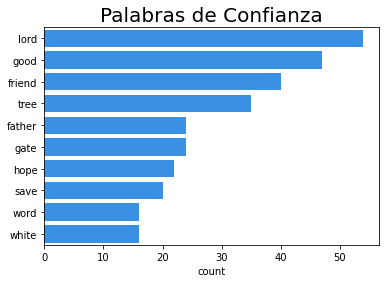

In [ ]:
sns.barplot(data=trust_df, x=trust_df['count'], y=trust_df.index, orient="h",color='dodgerblue')
plt.title("Palabras de Confianza", fontdict={"fontsize":20, "color":"black"})
plt.show()

In [ ]:
#Vader
cleaned_dialogs_df = pd.read_csv("lotr_cleaned_dialogs.csv")
cleaned_dialogs_df.columns=['index', 'personaje','dialogo']

sid = SentimentIntensityAnalyzer()

def getSentimental(personaje, dialogs):
    global sentimientos
    filtro_personaje = dialogs['personaje'] == personaje
    dialogos_pesonaje = dialogs[filtro_personaje]
    
    neg, neu, pos, counter = 0,0,0,0

    for dialogo in dialogos_pesonaje['dialogo']:
        results = sid.polarity_scores(str(dialogo))
        neg += results['neg']
        neu += results['neu']
        pos += results['pos']
        counter += 1        
        
    #adding mean of sentimental analysis   
    sentimientos = sentimientos.append({'character': personaje, 'neg':neg/counter, 'neu':neu/counter, 'pos':pos/counter},ignore_index = True) 

In [ ]:
#Dataframe for total sentimental analysis
sentimientos = pd.DataFrame(columns = ['character','neg','neu','pos'])

talkatives = ["FRODO","SAM","GANDALF","ARAGORN","PIPPIN","MERRY","GOLLUM","GIMLI","THEODEN","FARAMIR"]

for person in talkatives:
  getSentimental(person,cleaned_dialogs_df)
  
sentimientos

,character,neg,neu,pos
0,FRODO,0.045676,0.860707,0.089169
1,SAM,0.106194,0.819310,0.074491
2,GANDALF,0.111995,0.768102,0.119898
3,ARAGORN,0.079243,0.867389,0.053357
4,PIPPIN,0.072319,0.851233,0.076436
5,MERRY,0.041409,0.866036,0.092577
6,GOLLUM,0.153188,0.746699,0.092586
7,GIMLI,0.115026,0.785670,0.099322
8,THEODEN,0.117600,0.812800,0.069618
9,FARAMIR,0.095092,0.803292,0.101600


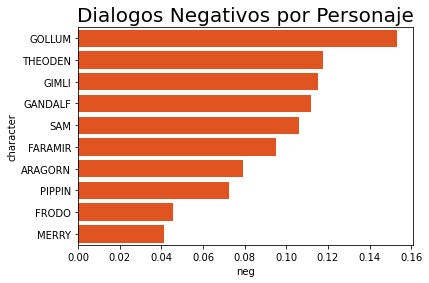

In [ ]:
#Graphics sentimental by character
sns.barplot(data=sentimientos.sort_values('neg',ascending=False), x='neg', y='character', orient="h", color="orangered")
plt.title("Dialogos Negativos por Personaje", fontdict={"fontsize":20, "color":"black"})
plt.show()

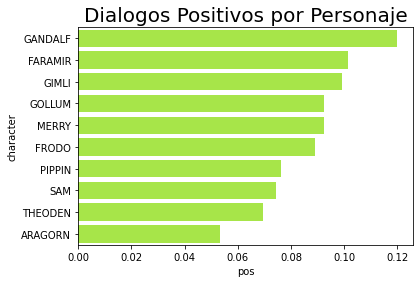

In [ ]:
sns.barplot(data=sentimientos.sort_values('pos',ascending=False), x='pos', y='character', orient="h", color='greenyellow')
plt.title("Dialogos Positivos por Personaje", fontdict={"fontsize":20, "color":"black"})
plt.show()